# Exploratory Data Analysis

In [1]:
from __init__ import FIRST_SAMPLE_DATASET, PASSWORD_FILE_PATH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import openpyxl
import io
import msoffcrypto
from textwrap import wrap

# import warnings
# warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)

sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## Load the data

In [2]:
FILE_PATH = FIRST_SAMPLE_DATASET
SHEET_NAME = 'Baza calość'
PASSWORD = '' # read from the password.txt file

In [3]:
password_file = PASSWORD_FILE_PATH
with open(password_file, 'r') as file:
    PASSWORD = file.read()

In [4]:
def load_data(file_path, sheet_name, password):
    decrypted_workbook = io.BytesIO()

    with open(file_path, 'rb') as file:
        office_file = msoffcrypto.OfficeFile(file)
        office_file.load_key(password=password)
        office_file.decrypt(decrypted_workbook)

    workbook = openpyxl.load_workbook(filename=decrypted_workbook, data_only=True)
    worksheet = workbook[sheet_name]
    dataframe = pd.DataFrame(worksheet.values)
    dataframe.columns = dataframe.iloc[0]
    return dataframe[1:]

df = load_data(FILE_PATH, SHEET_NAME, PASSWORD)
df.sample(10)

0   PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro CTRP1 ng/ml (to 192) CTRP1 ng/ml (>=192) proBNP proBNP>125 AMH (pmol/l) AMH (ng/ml) *7,14=pmol/l AMH>48pmol/l/>6,8ng/ml AMH>=4,7 ng/ml AMH>=4,57           birth date  date of examination age during examination weight height (cm) heigt (m)        BMI systolic BP (ciśnienie skurczowe) diastolic BP (ciśnienie rozskurczowe) Hypertension Waist Circumference (WC) WC>88 Hip Circumference (HC) WHR (Waist/Hip ratio) WHR>0,85 (WHO) WHR>0,8 (NIDDK) WHR risk for heart disease  WHTR (Waist/Height Ratio) WHTR>0,5 overweight/obesity 0-normal/low, 1-overweight, 2-obesity irregular cycles (0-nie, 1-tak) ovulation (0-brak, 1-obecna) PCO ovary morfology in USG (0-brak, 1--obecna) stromal hypertrophy in ovary (0-brak, 1-obecny) functional cyst teratoma  acne hirsutism FG score (Ferriman-Gallway score - stopień androgenizacji) day of cycle  \
72                                                   0                                                            None                None  41.58          0        13.96                 1.955182                      0              0         0  1985-02-19 00:00:00  2018-02-12 00:00:00              32.916667     54         172      1.72   18.25311                               107                                    68            0                       70     0                     80                 0.875              1               1                           4                  0.406977        0                                                  0                                     0                            1                                              0                                               0               0        0     0         0                                                  0                    6   
677                                                  1                                                            None                None   None       None         None                     None                   None           None      None                #REF!                 None                   None   None        None      None       None                              None                                  None         None                     None  None                   None                  None           None            None                        None                      None     None                                               None                                  None                         None                                           None                                            None            None     None  None      None                                               None                 None   
265                                                  1                                                            None                None   None       None      92.0346                    12.89                      1           None      None  1994-01-27 00:00:00  2020-01-23 00:00:00              25.916667   50.5         167      1.67      18.11                               122                                    76            0                     None  None                   None                  None           None            None                        None                      None     None                                                  0                                     1                            0                                              1                                               1               0        0     1         0                                                  3                    4   
610                                                  1                                                             192                   1  34.19          0        35.76                 5.008403                      0              1         1  1994-12-11 00:00:00  2017-01

In [5]:
df.shape

(1087, 164)

## Overview of the data

### Unify missing data

Some of the observed representations of null values are: None, '?', '#REF!', '#ADR!'. We will replace them with the np.nan value.

In [6]:
null_values_representations = ['?', '#REF!', '#ADR!', '#DIV/0!', '#VALUE!', ' ']

for null_representation in null_values_representations:
    print('value: ', null_representation)
    question_marks_count = (df == null_representation).sum()
    print(question_marks_count[question_marks_count>0], '\n')

value:  ?
0
day of cycle                                                                    1
phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)    3
elevated DHT                                                                    2
dtype: int64 

value:  #REF!
0
birth date                249
age during examination      5
thyroid volume              1
dtype: int64 

value:  #ADR!
Series([], dtype: int64) 

value:  #DIV/0!
0
PLR                 1
creatinine mg/dl    3
dtype: int64 

value:  #VALUE!
0
ovaries volume - total    3
dtype: int64 

value:   
0
macroprolactine (%)    6
dtype: int64 



In [7]:
for null_representation in null_values_representations:
    df.replace(null_representation, np.nan, inplace=True)

### Explore the types of the attributes

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 1 to 1087
Data columns (total 164 columns):
 #    Column                                                                                         Dtype  
---   ------                                                                                         -----  
 0    PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  object 
 1    CTRP1 ng/ml (to 192)                                                                           float64
 2    CTRP1 ng/ml (>=192)                                                                            object 
 3    proBNP                                                                                         float64
 4    proBNP>125                                                                                     float64
 5    AMH (pmol/l)                                                                                   object 
 6    AMH (ng/ml) *7

In [9]:
df.describe()
# top - the most common value,
# freq - the most common value's frequency.

0      CTRP1 ng/ml (to 192)      proBNP  proBNP>125  AMH>48pmol/l/>6,8ng/ml  AMH>=4,7 ng/ml   AMH>=4,57  age during examination      weight  height (cm)   heigt (m)         BMI  Hypertension  Waist Circumference (WC)       WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHR risk for heart disease   WHTR (Waist/Height Ratio)    WHTR>0,5  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  nodules 0-lack, 1-RL,  2-LL, 3-both  number of nodules  ovaries volume - total  follicules>25  hyperlipidemia  elevated LDL and TG  WBC x10^3/ul  neutrophil x10^3/ul  lymphocytes x10^3/ul  monocytes x10^3/ul  eosinocytes x10^3/ul  basophils x10^3/ul  % lymphocytes   % monocytes  %eosinocytes   %basophils   RBC x10^6ul  Hemoglobin [g/dl]  hematocrit [%]       HTC/Hb       MCV fl    MCHC g/dl     RDW-CV %  NRBC x10^3/ul  PLT x10^3/ul       PDW fl       MPV fl      PLT/WBC      MPV/PLT         PLR   limf/mono  \
count            156.000000  636.000000  638.000000              462.000000       458.00000  451.000000              807.000000  786.000000   786.000000  786.000000  785.000000    637.000000                702.000000  706.000000               705.00000             705.000000      705.000000       705.000000                   521.000000                 701.000000  700.000000                         756.000000                        754.000000      758.000000                           782.000000         785.000000              451.000000     627.000000     1009.000000           997.000000   1030.000000           942.000000            942.000000          941.000000            941.000000          941.000000      942.000000   940.000000     941.000000   941.000000  1030.000000        1030.000000     1030.000000  1030.000000  1030.000000  1024.000000  1026.000000    1019.000000   1030.000000  1025.000000  1025.000000  1028.000000  1030.000000  939.000000  940.000000   
mean             115.152564   49.530865    0.037618                0.359307         0.60917    0.620843               27.155721   68.995674   166.695929    1.686597   24.828883      0.084772                 79.842593    0.245042                89.68156               0.885475        0.696454         0.875177                     4.214971                   0.479505    0.334286                           5.594546                          4.333640        9.857382                             0.441334           0.548968               19.428619       0.228150        0.045590             0.015045      6.834417             3.580669              2.033737            0.497683              0.166812            0.049923       33.010701     7.920979       2.689405     0.817768     4.888313          13.103990       38.662408     2.948813    86.711621    33.841992    13.026004       0.087488    265.542913    12.749122    10.673951    45.063200     0.043066  143.259748    4.585637   
std               67.162003   45.530061    0.190419                0.480318         0.48847    0.485716                6.972171   17.097801     6.496381    0.516358    6.176648      0.278762                 13.793792    0.430417                13.43232               0.093758        0.460115         0.330752                     7.487672                   0.085117    0.472077                           3.248598                          3.168654        5.346185                             0.935670           1.526027               10.234672       0.915267        0.208697             0.121794     19.349737             1.614782              1.441383            0.389122              0.237135            0.129671       12.890292     3.500216       3.476791     1.931011    13.202501           1.137012        3.661657     0.197436     6.173557     1.404215     4.079116       1.598042     62.985053     3.672919     1.096659    13.288249     0.023191   48.826512    4.323394   
min                0.600000    0.080000    0.000000                0.000000         0.00

A vast majority has a float64 type, and we have quite many object type attributes.

## Categorical attributes

We first need to differenciate the categorical features from the numerical ones and then transform the types accordingly. To determine which attributes are categorical, we will look at the number of unique values

In [10]:
df.nunique().to_frame().T

0  PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  CTRP1 ng/ml (to 192)  CTRP1 ng/ml (>=192)  proBNP  proBNP>125  AMH (pmol/l)  AMH (ng/ml) *7,14=pmol/l  AMH>48pmol/l/>6,8ng/ml  AMH>=4,7 ng/ml  AMH>=4,57  birth date  date of examination  age during examination  weight  height (cm)  heigt (m)  BMI  systolic BP (ciśnienie skurczowe)  diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)  WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHR risk for heart disease   WHTR (Waist/Height Ratio)  WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  functional cyst  teratoma  acne  hirsutism  FG score (Ferriman-Gallway score - stopień androgenizacji)  day of cycle  \
0                                                  8                                                                99                    4     614           2           441                       441                       2               2          2         778                  517                     265     145           56         54  635                                 78                                     61             2                        74      2                      71                    422               2                2                            7                        507         2                                                  6                                       6                             4                                               5                                                5                4         4     4          4                                                 35                     78   

0  phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)  hyperandrogenism  elevated androgens  elevated DHT  hypothyroidism  low FT3  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  nodules 0-lack, 1-RL,  2-LL, 3-both  number of nodules  chronic thyroiditis  Vole of the Right Ovary  Volume of the  Left Ovary  ovaries volume - total  follicules >12  follicules>25  hyperlipidemia  elevated LDL and TG  hepatosteatosis  splenomegaly  cholelithiasis  WBC x10^3/ul  neutrophil x10^3/ul  lymphocytes x10^3/ul  monocytes x10^3/ul  eosinocytes x10^3/ul  basophils x10^3/ul  % neutrophil   % lymphocytes   % monocytes  %eosinocytes   %basophils   RBC x10^6ul  Hemoglobin [g/dl]  hematocrit [%]  HTC/Hb  MCV fl  MCH pg  MCHC g/dl  RDW-CV %  NRBC x10^3/ul  PLT x10^3/ul  PDW fl  MPV fl  P-LCR %  PLT/WBC  MPV/PLT  PLR  limf/mono  NLR (stosunek neutrofili do limfocytów)  L/WCC (leukocyty do całkowitej liczby krwinek białych)  eos/leukocyty  \
0                                                 13                                            7                 158             6               5        5                                482                               448             729                                    7                 16                    7                      540                        538                     411               5              5               2                    2                4             3               3           519                  427                   245                  92                    71                  21            360             335          108             96           29          180                 71             145     720     208     112         70        70              7           267     105      61      306     1014      929  915        840                                      922                                                926                 847   

0  sodium mmol/l  potassium mmol/l  calcium mg/dl  phosphorus mg/dl  creatinine mg/dl  CRP mg/l  ALT U

A list of manually selected categorical attributes (with indices)
1. PCO [0]
2. CTRP1 [2]
3. proBNP>125 [4]
4. AMH>48pmol/l/>6,8ng/ml [7]
5. AMH>=4,7 ng/ml [8]
6. AMH>=4,57 [9]
7. Hypertension [19]
8. WC>88 [21]
9. WHR>0,85 (WHO) [24]
10. WHR>0,8 (NIDDK) [25]
11. WHR risk for heart disease [26]
12. WHTR>0,5 [28]
13. overweight/obesity 0-normal/low, 1-overweight, 2-obesity [29]
14. irregular cycles (0-nie, 1-tak) [30]
15. ovulation (0-brak, 1-obecna) [31]
16. PCO ovary morfology in USG (0-brak, 1--obecna) [32]
17. stromal hypertrophy in ovary (0-brak, 1-obecny) [33]
18. functional cyst [34]
19. teratoma [35]
20. acne [36]
21. hirsutism [37]
22. phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki) [40]
23. hyperandrogenism [41]
24. elevated DHT [43]
25. hypothyroidism [44]
26. low FT3 [45]
27. nodules 0-lack, 1-RL, 2-LL, 3-both [49]
28. chronic thyroiditis [51]
29. follicules >12 [55]
30. follicules>25 [56]
31. hyperlipidemia [57]
32. elevated LDL and TG [58]
33. hepatosteatosis [59]
34. splenomegaly [60]
35. cholelithiasis [61]
36. CHOL>200 [103]
37. HDL<50 [105]
38. LDL>135 [107]
49. TG>150 [109]
40. Impaired Fasting Glucose [124]
41. Impaired Glucose Tolerance [125]
42. SHBG>110 [145]
43. FTI>6,53 [147]
44. DHT>368 [156]

### Exctract the categorical attributes

In [11]:
import re

# text_format = input() # NOTE: copy the above markdown description and paste here to extract the indices
# extracted_indices_in_square_brackets = re.findall(r'\[(\d+)\]', text_format)
# categorical_attributes_indices = list(map(int, extracted_indices_in_square_brackets))
categorical_attributes_indices = [0, 2, 4, 7, 8, 9, 19, 21, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 43, 44, 45, 49, 51, 55, 56, 57, 58, 59, 60, 61, 103, 105, 107, 109, 124, 125, 145, 147, 156]
print(f'There are {len(categorical_attributes_indices)} categorical attributes in the dataset, with the following indices:')
print(categorical_attributes_indices)
categorical_attributes = df.columns[categorical_attributes_indices]
print(f'\nCategorical attributes: {categorical_attributes}')

There are 44 categorical attributes in the dataset, with the following indices:
[0, 2, 4, 7, 8, 9, 19, 21, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 43, 44, 45, 49, 51, 55, 56, 57, 58, 59, 60, 61, 103, 105, 107, 109, 124, 125, 145, 147, 156]

Categorical attributes: Index(['PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro', 'CTRP1 ng/ml (>=192)', 'proBNP>125', 'AMH>48pmol/l/>6,8ng/ml', 'AMH>=4,7 ng/ml', 'AMH>=4,57', 'Hypertension', 'WC>88', 'WHR>0,85 (WHO)', 'WHR>0,8 (NIDDK)', 'WHR risk for heart disease ', 'WHTR>0,5', 'overweight/obesity 0-normal/low, 1-overweight, 2-obesity', 'irregular cycles (0-nie, 1-tak)', 'ovulation (0-brak, 1-obecna)', 'PCO ovary morfology in USG (0-brak, 1--obecna)', 'stromal hypertrophy in ovary (0-brak, 1-obecny)', 'functional cyst', 'teratoma', 'acne', 'hirsutism', 'phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)', 'hyperandrogenism', 'elevated DHT', 'hypothyroidism'

### Clean categorical variables

In [12]:
df[categorical_attributes].nunique().to_frame().T

0  PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  CTRP1 ng/ml (>=192)  proBNP>125  AMH>48pmol/l/>6,8ng/ml  AMH>=4,7 ng/ml  AMH>=4,57  Hypertension  WC>88  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHR risk for heart disease   WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  functional cyst  teratoma  acne  hirsutism  phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)  hyperandrogenism  elevated DHT  hypothyroidism  low FT3  nodules 0-lack, 1-RL,  2-LL, 3-both  chronic thyroiditis  follicules >12  follicules>25  hyperlipidemia  elevated LDL and TG  hepatosteatosis  splenomegaly  cholelithiasis  CHOL>200  HDL<50  LDL>135  TG>150  Impaired Fasting Glucose   Impaired Glucose Tolerance  SHBG>110  FTI>6,53  DHT>368
0                                                  8                                                                4           2                       2               2          2             2      2               2                2                            7         2                                                  6                                       6                             4                                               5                                                5                4         4     4          4                                                 13                                            7             6               5        5                                    7                    7               5              5               2                    2                4             3               3         2       2        2       2                          2                           2         2         2        2

In [13]:
def show_all_unique_values(df, col_index):
    print(f'Attribute[{col_idx}]: {df.columns[col_index]}')
    col_unique_values = df.iloc[:, col_index].value_counts().index
    print(f'\tUnique values: {list(col_unique_values)}\n')
    return col_unique_values

for col_idx in categorical_attributes_indices:
    show_all_unique_values(df, col_idx)

Attribute[0]: PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro
	Unique values: [1, 0, 2, 4, 3, '1', '0', '2']

Attribute[2]: CTRP1 ng/ml (>=192)
	Unique values: ['0', '1', 0, 1]

Attribute[4]: proBNP>125
	Unique values: [0.0, 1.0]

Attribute[7]: AMH>48pmol/l/>6,8ng/ml
	Unique values: [0.0, 1.0]

Attribute[8]: AMH>=4,7 ng/ml
	Unique values: [1.0, 0.0]

Attribute[9]: AMH>=4,57
	Unique values: [1.0, 0.0]

Attribute[19]: Hypertension
	Unique values: [0.0, 1.0]

Attribute[21]: WC>88
	Unique values: [0.0, 1.0]

Attribute[24]: WHR>0,85 (WHO)
	Unique values: [1.0, 0.0]

Attribute[25]: WHR>0,8 (NIDDK)
	Unique values: [1.0, 0.0]

Attribute[26]: WHR risk for heart disease 
	Unique values: [4.0, 3.0, 2.0, 1.0, 96.0, 104.0, 106.0]

Attribute[28]: WHTR>0,5
	Unique values: [0.0, 1.0]

Attribute[29]: overweight/obesity 0-normal/low, 1-overweight, 2-obesity
	Unique values: [0, 2, 1, '0', '2', '1']

Attribute[30]: irregular cycles (0-nie, 1-tak)
	Unique value

We can see that numbers encoded as string is the most frequent issue in the data. This we can fix easily by changing the data type to numerical. However, we also have a couple of outliers and unexpected values, e.g.:
- values: [96, 104, 106] in 'WHR risk for heart disease'[26], which is supposed to be one of [1,2,3,4]
- values: [2, '2'] in `irregular cycles (0-nie, 1-tak)`[30]
- value: 2 in 'PCO ovary morfology in USG (0-brak, 1--obecna)'[32]
- value: 9 in 'stromal hypertrophy in ovary (0-brak, 1-obecny)'[33]
- values: [3,4,5] in 'hyperandrogenism'[41]
- value 'F' and 2 in 'elevated DHT'[43]
- value 9 in 'hypothyroidism'[44]
- value 9 in ' low FT3'[45]
- values [1.728, 5.04, 5.355] in 'nodules 0-lack, 1-RL,  2-LL, 3-both'[49]
- values [4.768, 6.635, 9.66] in 'chronic thyroiditis'[51]
- values ['4,8*2,8', 11.53, 8] in 'follicules >12'[55]
- values [12.43, 14.69, 8.93] in 'follicules>25'[56]


Moreover, the column
- `phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)`[40] - is not numerical, plus it has some unexpected values

Investigate the problematic columns:

In [14]:
problematic_attributes = [26,30,32,33,41,43,44,45,49,51,55,56,40]

for col_index in problematic_attributes:
    print(f'[{col_index}]{df.iloc[:,col_index].value_counts().to_frame().T}\n')

[26]WHR risk for heart disease   4.0    3.0    2.0    1.0    96.0   104.0  106.0
count                          389     87     31     11      1      1      1

[30]irregular cycles (0-nie, 1-tak)    1    0   1   0  2  2
count                            517  162  32  13  1  1

[32]PCO ovary morfology in USG (0-brak, 1--obecna)    1    0   0   1  2
count                                           301  297  23  22  2

[33]stromal hypertrophy in ovary (0-brak, 1-obecny)    0    1   1   0  9
count                                            401  202  23  22  1

[41]hyperandrogenism    1    0   0   1  5  3  4
count             367  244  25  21  1  1  1

[43]elevated DHT    1    0   0   1  F  2
count         289  247  32  28  1  1

[44]hypothyroidism    0    1   0   1  9
count           463  293  27  26  1

[45]low FT3    0   1   0  1  9
count    592  46  41  5  1

[49]nodules 0-lack, 1-RL,  2-LL, 3-both  0.000  1.000  3.000  2.000  1.728  5.040  5.355
count                                  612 

### Problematic rows, which seem to have incorrectly typed/shifted values.
E.g. categorical attributes (0/1) get values like: [1.728, 5.040, 5.355].
The problematic rows were found based on the categorical attribute values.

In [15]:
def show_observations_with_given_attribute_values(df, attribute, values):
    return df[df[attribute].isin(values)]

In [16]:
whr_risk_outliers = show_observations_with_given_attribute_values(df, 'WHR risk for heart disease ', [96.0, 104.0, 106.0])
irregular_cycles_outliers = show_observations_with_given_attribute_values(df, 'irregular cycles (0-nie, 1-tak)', [2, '2'])
pco_ovary_morf_outliers = show_observations_with_given_attribute_values(df, 'PCO ovary morfology in USG (0-brak, 1--obecna)', [2])
stromal_hyper_outliers = show_observations_with_given_attribute_values(df, 'stromal hypertrophy in ovary (0-brak, 1-obecny)', [9])
hyperandrogenizm_outliers = show_observations_with_given_attribute_values(df, 'hyperandrogenism', [3,4,5])
elevated_dht_outliers = show_observations_with_given_attribute_values(df, 'elevated DHT', [2, 'F'])
hypothyroidism_outliers = show_observations_with_given_attribute_values(df, 'hypothyroidism', [9])
low_ft3_outliers = show_observations_with_given_attribute_values(df, 'low FT3', [9])
nodules_outliers = show_observations_with_given_attribute_values(df, 'nodules 0-lack, 1-RL,  2-LL, 3-both', [1.728, 5.040, 5.355])
chronic_thyroiditis_outliers = show_observations_with_given_attribute_values(df, 'chronic thyroiditis', [4.768, 6.635, 9.66])
follicules_12_outliers = show_observations_with_given_attribute_values(df, 'follicules >12', ['4,8*2,8', 11.53,  8])
follicules_25_outliers = show_observations_with_given_attribute_values(df, 'follicules>25', [12.43, 14.69, 8.93])
phase_of_menstrual_outliers = show_observations_with_given_attribute_values(df, 'phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)', ['DA', 0, 'HTZ'])


In [17]:
all_outlier_rows = [whr_risk_outliers, irregular_cycles_outliers, pco_ovary_morf_outliers, stromal_hyper_outliers, hyperandrogenizm_outliers,
                   elevated_dht_outliers, hypothyroidism_outliers, low_ft3_outliers, nodules_outliers, chronic_thyroiditis_outliers,
                   follicules_12_outliers, follicules_25_outliers, phase_of_menstrual_outliers,
                   ]

for outlier_rows in all_outlier_rows:
    print(outlier_rows.index+1) # excel rows have +1 index

Index([317, 384, 655], dtype='int64')
Index([261, 508], dtype='int64')
Index([384, 655], dtype='int64')
Index([613], dtype='int64')
Index([317, 384, 655], dtype='int64')
Index([317, 653], dtype='int64')
Index([710], dtype='int64')
Index([543], dtype='int64')
Index([317, 384, 655], dtype='int64')
Index([317, 384, 655], dtype='int64')
Index([317, 384, 655], dtype='int64')
Index([317, 384, 655], dtype='int64')
Index([106, 138, 182, 189, 215, 317, 384, 417, 531, 655, 829, 840, 940, 953], dtype='int64')


In [18]:
all_outlier_rows = [whr_risk_outliers, irregular_cycles_outliers, pco_ovary_morf_outliers, stromal_hyper_outliers, hyperandrogenizm_outliers,
                   elevated_dht_outliers, hypothyroidism_outliers, low_ft3_outliers, nodules_outliers, chronic_thyroiditis_outliers,
                   follicules_12_outliers, follicules_25_outliers, phase_of_menstrual_outliers,
                   ]

outliers_df = pd.concat(all_outlier_rows, ignore_index=False).sort_index().drop_duplicates()
outliers_df

0   PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  CTRP1 ng/ml (to 192) CTRP1 ng/ml (>=192)  proBNP  proBNP>125 AMH (pmol/l) AMH (ng/ml) *7,14=pmol/l  AMH>48pmol/l/>6,8ng/ml  AMH>=4,7 ng/ml  AMH>=4,57           birth date  date of examination  age during examination  weight  height (cm)  heigt (m)        BMI systolic BP (ciśnienie skurczowe) diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)  WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHR risk for heart disease   WHTR (Waist/Height Ratio)  WHTR>0,5 overweight/obesity 0-normal/low, 1-overweight, 2-obesity irregular cycles (0-nie, 1-tak) ovulation (0-brak, 1-obecna) PCO ovary morfology in USG (0-brak, 1--obecna) stromal hypertrophy in ovary (0-brak, 1-obecny) functional cyst teratoma  acne hirsutism FG score (Ferriman-Gallway score - stopień androgenizacji) day of cycle  \
105                                                  0                                                              NaN                None     NaN         NaN         None                     None                     NaN             NaN        NaN  1990-06-19 00:00:00  2019-11-19 00:00:00               29.416667    59.0        161.0      1.610  22.760000                               116                                    67           0.0                      73.0    0.0                    75.0               0.973333             1.0              1.0                          NaN                   0.453416       0.0                                                  0                                     1                            0                                              0                                               0               0        0     1         0                                               None                 None   
137                                                  0                                                              NaN                None  144.20         1.0         None                     None                     NaN             NaN        NaN  1980-04-28 00:00:00  2018-05-24 00:00:00               38.000000    71.0        172.0      1.720  23.999459                               123                                    87           0.0                      84.0    0.0                    88.0               0.954545             1.0              1.0                          4.0                   0.488372       0.0                                                  0                                     0                            0                                              0                                               0               0        0     0         0                                                  1                 None   
181                                                  0                                                              NaN                None   71.02         0.0         None                     None                     NaN             NaN        NaN  1978-03-06 00:00:00  2018-03-07 00:00:00               40.000000    98.0        168.0      1.680  34.722222                               132                                    97           0.0                     110.0    1.0                   115.0               0.956522             1.0              1.0                          4.0                   0.654762       1.0                                                  2                                     0                            0                                              0                                               0               0        0     0         0                                                  5                 None   
188                                                  0                                                              NaN                None     NaN         NaN         None                    

We notice that almost all those unexpected values occure only once in the dataset, thus they are very likely some mistakes and we can transform them to NaN.

In [19]:
# define a map of outliers that we want to remove
outliers_to_remove_map = {26: [96, 104, 106], 30: ['2', 2], 32: [2], 33: [9], 40: ['nieokreślona'], 41: [3,4,5], 43: ['F', 2], 44: [9], 45: [9],
                          49: [1.728, 5.040, 5.355], 51: [4.768, 6.635, 9.66], 55: ['4,8*2,8', 11.53, 8], 56: [12.43, 14.69, 8.93],
                          }

for col_idx, outliers in outliers_to_remove_map.items():
    for outlier in outliers:
        df.iloc[:,col_idx].replace(outlier, np.nan, inplace=True)

In [20]:
for col_idx in categorical_attributes_indices:
    show_all_unique_values(df, col_idx)

Attribute[0]: PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro
	Unique values: [1, 0, 2, 4, 3, '1', '0', '2']

Attribute[2]: CTRP1 ng/ml (>=192)
	Unique values: ['0', '1', 0, 1]

Attribute[4]: proBNP>125
	Unique values: [0.0, 1.0]

Attribute[7]: AMH>48pmol/l/>6,8ng/ml
	Unique values: [0.0, 1.0]

Attribute[8]: AMH>=4,7 ng/ml
	Unique values: [1.0, 0.0]

Attribute[9]: AMH>=4,57
	Unique values: [1.0, 0.0]

Attribute[19]: Hypertension
	Unique values: [0.0, 1.0]

Attribute[21]: WC>88
	Unique values: [0.0, 1.0]

Attribute[24]: WHR>0,85 (WHO)
	Unique values: [1.0, 0.0]

Attribute[25]: WHR>0,8 (NIDDK)
	Unique values: [1.0, 0.0]

Attribute[26]: WHR risk for heart disease 
	Unique values: [4.0, 3.0, 2.0, 1.0]

Attribute[28]: WHTR>0,5
	Unique values: [0.0, 1.0]

Attribute[29]: overweight/obesity 0-normal/low, 1-overweight, 2-obesity
	Unique values: [0, 2, 1, '0', '2', '1']

Attribute[30]: irregular cycles (0-nie, 1-tak)
	Unique values: [1, 0, '1', '0']


Now, we need to unify the attribute [40]: `phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)`. We can see that very likely we can group those values into:
- 'F' and 'f' very likely both representing follicular phase
- 'O','o','0', 0 - ovulatory phase
- 'L', 'l' - luteal phase
- 'WBM' - lack of menstruation
- 'F/O' - probably between F and O, we have more examples of the L phase, thus we assigned it there

TODO: decide what to do with the following ones:
- 'DA' - 10 instances - ?
- 'HTZ' - ?

In [21]:
# define the values that we want to replace
replacement_map = {'F': ['f', 'F/O'], 'O': ['o', '0', 0], 'L': ['l']}

for target_symbol, symbols_to_replace in replacement_map.items():
    for symbol in symbols_to_replace:
        df.iloc[:,40].replace(symbol, target_symbol, inplace=True)

df.iloc[:,40].value_counts()

phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)
F      299
L      225
WBM     74
O       61
DA      10
HTZ      1
Name: count, dtype: int64

Now all attributes, except for [40]: `phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)` can be transformed to numerical type.


In [22]:
columns_to_transform_to_numerical = list(categorical_attributes)
idx = categorical_attributes_indices.index(40) # all categorical except of the phase of menstrual cycle
del columns_to_transform_to_numerical[idx]

In [23]:
def transform_col_to_int_type(df, col_name):
    df[col_name] = np.floor(pd.to_numeric(df[col_name], errors='coerce')).astype('Int64')
    return df

for col_name in columns_to_transform_to_numerical:
    df = transform_col_to_int_type(df, col_name)

for col_idx in categorical_attributes_indices:
    show_all_unique_values(df, col_idx)


Attribute[0]: PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro
	Unique values: [1, 0, 2, 4, 3]

Attribute[2]: CTRP1 ng/ml (>=192)
	Unique values: [0, 1]

Attribute[4]: proBNP>125
	Unique values: [0, 1]

Attribute[7]: AMH>48pmol/l/>6,8ng/ml
	Unique values: [0, 1]

Attribute[8]: AMH>=4,7 ng/ml
	Unique values: [1, 0]

Attribute[9]: AMH>=4,57
	Unique values: [1, 0]

Attribute[19]: Hypertension
	Unique values: [0, 1]

Attribute[21]: WC>88
	Unique values: [0, 1]

Attribute[24]: WHR>0,85 (WHO)
	Unique values: [1, 0]

Attribute[25]: WHR>0,8 (NIDDK)
	Unique values: [1, 0]

Attribute[26]: WHR risk for heart disease 
	Unique values: [4, 3, 2, 1]

Attribute[28]: WHTR>0,5
	Unique values: [0, 1]

Attribute[29]: overweight/obesity 0-normal/low, 1-overweight, 2-obesity
	Unique values: [0, 2, 1]

Attribute[30]: irregular cycles (0-nie, 1-tak)
	Unique values: [1, 0]

Attribute[31]: ovulation (0-brak, 1-obecna)
	Unique values: [0, 1]

Attribute[32]: PCO ovary 

### Distributions for categorical data

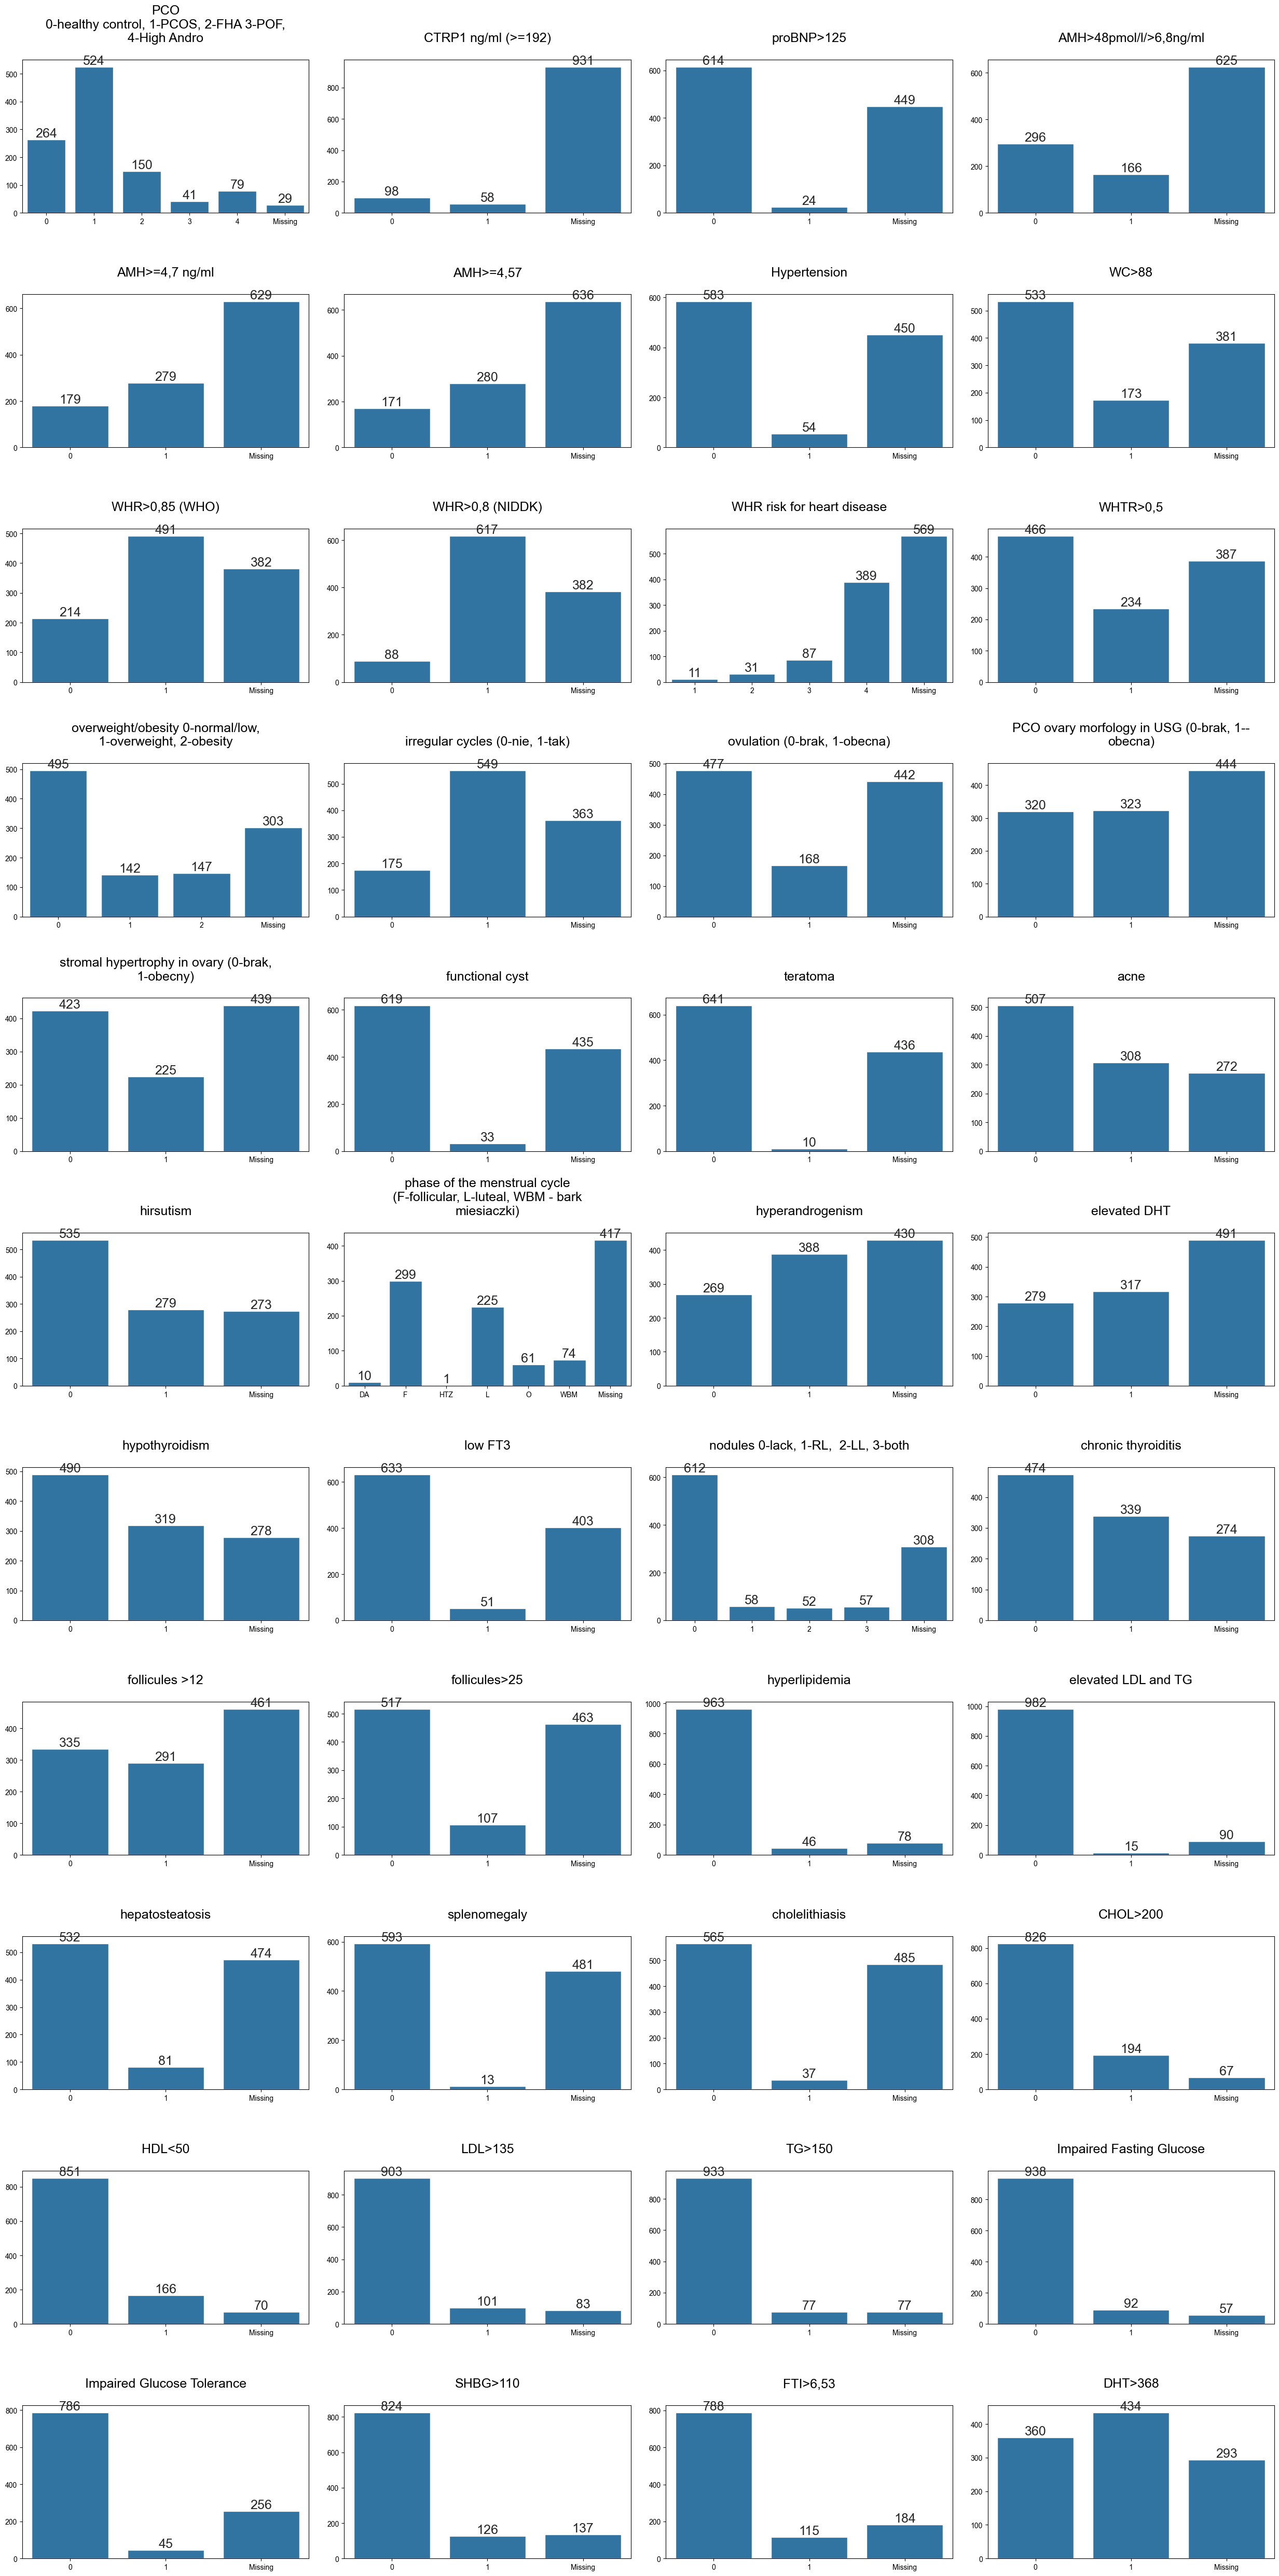

In [24]:
n_rows = 11
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 50))
sns.set(font_scale = 1.5)

for i, col in enumerate(categorical_attributes):
    ax = axes[int(i/n_cols)][i%n_cols]
    value_counts = df[col].value_counts()
    # display missing values
    missing_values = df[col].isnull().sum()
    value_counts.index = value_counts.index.astype(str)
    value_counts = value_counts.sort_index()
    value_counts['Missing'] = missing_values
    #
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
    ax.set_title("\n".join(wrap(col, 40)) + '\n')
    ax.bar_label(ax.containers[0])
    ax.set_xlabel('')

fig.tight_layout()
plt.show()

In [25]:
df[categorical_attributes].dtypes

0
PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro     Int64
CTRP1 ng/ml (>=192)                                                                               Int64
proBNP>125                                                                                        Int64
AMH>48pmol/l/>6,8ng/ml                                                                            Int64
AMH>=4,7 ng/ml                                                                                    Int64
AMH>=4,57                                                                                         Int64
Hypertension                                                                                      Int64
WC>88                                                                                             Int64
WHR>0,85 (WHO)                                                                                    Int64
WHR>0,8 (NIDDK)                                               

In [26]:
# display_percentage_of_missing_values(df[categorical_attributes])

## Continuous attributes

In [27]:
continuous_attributes = df.columns.drop(categorical_attributes)
df[continuous_attributes].head()

0  CTRP1 ng/ml (to 192)  proBNP AMH (pmol/l) AMH (ng/ml) *7,14=pmol/l           birth date  date of examination  age during examination  weight  height (cm)  heigt (m)        BMI systolic BP (ciśnienie skurczowe) diastolic BP (ciśnienie rozskurczowe)  Waist Circumference (WC)  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHTR (Waist/Height Ratio) FG score (Ferriman-Gallway score - stopień androgenizacji) day of cycle elevated androgens  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  number of nodules Vole of the Right Ovary Volume of the  Left Ovary  ovaries volume - total  WBC x10^3/ul  neutrophil x10^3/ul  lymphocytes x10^3/ul  monocytes x10^3/ul  eosinocytes x10^3/ul  basophils x10^3/ul % neutrophil   % lymphocytes   % monocytes  %eosinocytes   %basophils   RBC x10^6ul  Hemoglobin [g/dl]  hematocrit [%]    HTC/Hb  MCV fl MCH pg  MCHC g/dl  RDW-CV %  NRBC x10^3/ul  PLT x10^3/ul  PDW fl  MPV fl P-LCR %    PLT/WBC   MPV/PLT         PLR  \
1                   NaN   72.95         None                     None  1983-04-27 00:00:00  2018-09-01 00:00:00               35.333333     NaN          NaN        NaN        NaN                              None                                  None                       NaN                     NaN                    NaN                        NaN                                               None                 None               None                                NaN                               NaN             NaN                0.0                    None                      None                     NaN          6.82                 4.18                  2.11                0.39                  0.09                0.05          61.4            30.9          5.7            1.3          0.7         4.78               12.9            38.9  3.015504    81.4     27       33.2      14.5            0.0         335.0    12.6    10.8    31.6  49.120235  0.032239  158.767773   
2                   NaN     NaN         None                     None  1998-11-09 00:00:00  2018-05-16 00:00:00               19.500000    62.0        176.5      1.765  19.902254                              None                                  None                      73.0                    80.0               0.912500                   0.413598                                               None                 None               None                              6.279                            12.397          18.676                4.0                    None                      None                     NaN          6.56                 3.57                  2.19                0.57                  0.19                0.04          54.4            33.4          8.7            2.9          0.6         4.35               12.3            36.5  2.967480    83.9   28.3       33.7      13.5            0.0         308.0    13.9    11.4    35.8  46.951220  0.037013  140.639269   
3                   NaN   50.98         None                     None  1986-10-19 00:00:00  2018-09-17 00:00:00               31.833333    84.0        170.0      1.700  29.065744                               119                                    73                      96.0                   100.0               0.960000                   0.564706                                                  4                   10                  0                              7.650                             3.510          11.160                0.0               2,67*2,34                      9.89                     NaN          5.06                 2.52                  1.69                0.59                  0.21                0.05          49.7            33.4         11.7            4.2          1.0         4.38               13.0            38.3  2.946154    87.4   29.7       33.9      12.6            0.0         220.0    14.1    11.1    33.7  43.478261  0.050455  130.177515   
4                 192.0   25

In [28]:
df[continuous_attributes].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 1 to 1087
Data columns (total 120 columns):
 #    Column                                                      Dtype  
---   ------                                                      -----  
 0    CTRP1 ng/ml (to 192)                                        float64
 1    proBNP                                                      float64
 2    AMH (pmol/l)                                                object 
 3    AMH (ng/ml) *7,14=pmol/l                                    object 
 4    birth date                                                  object 
 5    date of examination                                         object 
 6    age during examination                                      float64
 7    weight                                                      float64
 8    height (cm)                                                 float64
 9    heigt (m)                                                   float64
 10 

We will investigate deeper the attribuses of `object` type. There's 29 of such columns.

In [29]:
attribute_types = df[continuous_attributes].dtypes
object_type_continuous_attributes = list(attribute_types[attribute_types == "object"].index)
len(object_type_continuous_attributes), object_type_continuous_attributes

(26,
 ['AMH (pmol/l)',
  'AMH (ng/ml) *7,14=pmol/l',
  'birth date',
  'date of examination',
  'systolic BP (ciśnienie skurczowe)',
  'diastolic BP (ciśnienie rozskurczowe)',
  'FG score (Ferriman-Gallway score - stopień androgenizacji)',
  'day of cycle',
  'elevated androgens',
  'Vole of the Right Ovary',
  'Volume of the  Left Ovary',
  '% neutrophil ',
  'MCH pg',
  'P-LCR %',
  'CRP mg/l',
  'insulin 0 uU/ml',
  'Matsuda',
  'TSH mIU/L',
  'LH',
  'Parathormone pg/ml',
  'ACTH pg/ml',
  'macroprolactine (%)',
  '17-OH-progesterone ng/ml',
  'Dihydrotestosterone pg/ml',
  'birth length',
  'week of gestation'])

In [30]:
df[object_type_continuous_attributes].sample(10)

0   AMH (pmol/l) AMH (ng/ml) *7,14=pmol/l           birth date  date of examination systolic BP (ciśnienie skurczowe) diastolic BP (ciśnienie rozskurczowe) FG score (Ferriman-Gallway score - stopień androgenizacji) day of cycle    elevated androgens Vole of the Right Ovary Volume of the  Left Ovary % neutrophil  MCH pg P-LCR % CRP mg/l insulin 0 uU/ml Matsuda TSH mIU/L    LH Parathormone pg/ml ACTH pg/ml macroprolactine (%) 17-OH-progesterone ng/ml Dihydrotestosterone pg/ml birth length week of gestation
639         None                     None                  NaN                 None                              None                                  None                                               None                 None                  None                    None                      None          54.9   29.3    25.5     None            27.3     1.7      1.56     7               None         61                None                     0.47                       459         None              None
623         63.1                 8.837535  1984-12-03 00:00:00  2017-05-08 00:00:00                               110                                    65                                                  2                   15                DHEAS,                   15.05                     19.05            51   30.2    20.4      0.8             7.7    None      0.58  17.4              47.78      26.08                None                     2.53                       335         None              None
73          None                     None  1978-05-02 00:00:00  2016-10-02 00:00:00                              None                                  None                                               None                 None                  None                    None                      None          56.5   28.9    32.9     None            12.6    5.18       1.5  None               None       None                None                     1.53                      None         None              None
662         None                     None                  NaN  2020-02-27 00:00:00                               141                                    85                                                  0                   18       DHEAS, DHT, FTI                    7.61                     10.82          67.7   28.2    31.6     None              20    2.31      2.22  20.7               None       15.7                None                     2.33                       544         None              None
161         10.6                 1.484594  1983-08-28 00:00:00  2018-07-09 00:00:00                              None                                  None                                               None                 None                  None                    None                      None          None   None    None     None            15.8    4.33      1.02     6               None       None                None                     1.71                      None         None              None
496           49                 6.862745  1986-06-19 00:00:00  2017-03-23 00:00:00                               119                                    89                                               None                   54                DHT, A                      13                     13.85            56   25.1    28.8      8.9           22.79    2.68      1.77  12.5              63.12      10.25                None                     1.83                       571           57                39
219         None                     None  1987-01-06 00:00:00  2019-08-23 00:00:00                              None                                  None                                                  0                    4                  None                    8.66                      6.18          49.8   28.7      31      2.1               9    None      2.01   7.3              83.22       8.38                None   

Firstly, we will handle the datatime attributes. We'll convert those attributes to their proper `datetime64[ns]` type

In [31]:
datetime_attributes = ['date of examination', 'birth date']

for datetime_attribute in datetime_attributes:
    df[datetime_attribute] = pd.to_datetime(df[datetime_attribute])
    # remove it from the list of object type continuous attributes
    object_type_continuous_attributes.remove(datetime_attribute)

Next, we can see that the `elevated androgens` attribute has only string values, and it can be further splitted into several categorical attributes. A seaparate column for each of the androgens.

In [32]:
df['elevated androgens'].value_counts().to_frame().T

elevated androgens  17OHP   0  A, 17OHP  DHT   A  A, DHT  DHEAS  DHEAS, A, DHT, 17OHP  DHT, 17OHP  DHEAS, DHT, 17OHP  17OHP, DHT  A, DHT, 17OHP  DHEAS, DHT  DHEAS, A, DHT  A, 17OHP, DHT  DHEAS, 17OHP  DHEAS, A, 17OHP, DHT  ANDR  FTI, A, DHT  DHT, A  DHEAS, DHT, A  0  T, A  DHEAS, A  DHEAS, 17OHP, DHT  A,   DHEAS, DHT, 17OHP, A  DHEAS, A, 17OHP  17OH, DHT  A, DHT,   DHEAS, FTI, A, DHT, 17OHP  A 17OHP DHT  DHEAS, DHT, A, 17OHP  17OHP, A  A, 17OHP, DHEAS  DHEAS, T, A, DHT  FTI, 17OHP, DHT  A, 17OHP, DHT, DHEAS  DHEAS,  A, DHEAS  T, FTI, A, DHT  DHEAS, 17OHP, A, DHT  17OHP, A, DHT  T, A, 17OHP  A 17OHP  DHEAS,   DHEAS, FTI, DHT, A, 17OHP  17ohp  DHT, A 17OHP  A, FTI, DHEAS, DHT  DHT, 17OHp  DHEAS, A, DHT. 17OHP  DHT. 17OHP  DHEAS< DHT  DHEAS, T, A, DHT, 17OHP  T, 17OHP,   DHEAS, DHT, A, 27OHP  a, DHT, 17OHP  DHEAS, FTI, DHT,  FTI, DHT  DHEAS, FTI,   17OHP, FTI, DHT  T, FTI, A, DHEAS, DHT  A, FTI, DHEAS,DHT  A, 17OHP, T  DHEAS, DHT, A?, 17OHP?  DHEAS, FTI, 17OHP, DHT  T, FTI, DHEAS  \
count                  46  38        34   31  30      25     19                    13          13                 12          12              9           9              8              7             7                     5     4            4       4              4  4     4         4                  4    4                     4                4          3         3                          3            3                     3         3                2                 2                2                     2       2         2               2                     2              2            2        2        2                          2      2             2                   1           1                     1           1           1                        1           1                     1              1                 1         1             1                1                      1                  1            1                       1                       1              1   

elevated androgens  17OHP, DHT, A  DHT, 17OH  DHEAS, 17OH,   A. DHT  T, FTI, DHEAS, A, DHT  DHEAS FTI, A, DHT, 17OHP  DHEAS, FTI,ANDR,  DHT, 17OHP, A  DHEAS, A,   DHEAS, DHT, A,   170OHP  17OHP, ANDR  DHEAS, A, SHT, 17OHP  DHT, DHEAS  17OHP,   17OHP,ANDR, DHT  A, DHEAS, T, DHT, 17OHP  DHEAS, A, DHT,   DHEAS, DHT, 17OHP, FTI  dHEAS, FTI, 17OHP, DHT, A  T, DHT, A  DHEAS, FTI, DHT, 17OHP, A  SHEAS, T  dht, 17hop  DHEAS, DHT, FTI, 17OH  DHEAS, DHT, FTI  DHEAS, FTI, DHT, A  360  fti, A, DHT  DHEAS, SHT, 17OHP, A  T, A, FTI, DHT, DHEAS  FTI, T, DHT, A, 17OHP  DHT, DHT, 17OHP  a, dht  A, DHT, DHEAS, 17OHP  17ohp, A, DHT  a, DHT  T, A, DHT, DHEAS  DHT, 17OHP, DHEAS  A, DHT, 17OHP, DHEAS  A, DHEAS, 17OHP, DHT  8  A, 17OHP, DHEAS,   DHT, A, DHEAS, 17OHP  FTI,  17OHP, A, DHT  A, DHT, 17ohp  DHEAS, T, DHT, A, 17OHP  DHEAS, 17ohP, DHT  DHEAS, 17OHP,A  DHEAS, DHT, 17OHP,A  DHEAS, 17OH  T  DHEAS, FTI, DHT  DHEAS, T, A, 17OHP, DHT  A, 17OHP,   DHT, A, 17OHP  DHEAS, DHT, FTI, 17OHP  17ohp, dht  \
count                           1          1              1       1                      1                         1                 1              1           1                1       1            1                     1           1        1                1                        1                1                       1                          1          1                          1         1           1                      1                1                   1    1            1                     1                      1                      1                1       1                     1              1       1                 1                  1                     1                     1  1                  1                     1                    1              1                        1                  1               1                    1            1  1                1                        1           1              1                       1           1   

elevated androgens

In [33]:
# x = df['elevated androgens'].str.split(' ,').value_counts()
# len(x), x

In [34]:
df['elevated androgens'].str.get_dummies(sep=',| ').columns

Index(['0', '170OHP', '17OH', '17OHP', '17OHP?', '17OHp', '17hop', '17ohP', '17ohp', '27OHP', '360', '720', '8', 'A', 'A.', 'A<', 'A?', 'ANDR', 'DHEAS', 'DHEAS<', 'DHT', 'DHT.', 'FTI', 'FTI.', 'FTI?', 'SHEAS', 'SHT', 'T', 'a', 'dHEAS', 'dheas', 'dht', 'fti', '|'], dtype='object')

In [35]:
df['elevated androgens'].str.get_dummies(sep=',| ').sum()

0         42
170OHP     1
17OH       1
17OHP     46
17OHP?     1
17OHp      0
17hop      0
17ohP      0
17ohp      2
27OHP      0
360        1
720        1
8          1
A         30
A.         0
A<         0
A?         0
ANDR       4
DHEAS     19
DHEAS<     0
DHT       31
DHT.       0
FTI        0
FTI.       0
FTI?       0
SHEAS      0
SHT        0
T          1
a          1
dHEAS      0
dheas      0
dht        0
fti        0
|          0
dtype: int64

In [36]:
df['elevated androgens'].str.get_dummies(sep=',').columns

Index([' ', '  17OHP', '  A', ' 17OH', ' 17OHP', ' 17OHP?', ' 17OHp', ' 17hop', ' 17ohP', ' 17ohp', ' 27OHP', ' A', ' A 17OHP', ' A< DHT', ' A?', ' ANDR', ' DHEAS', ' DHT', ' DHT ', ' DHT. 17OHP', ' FTI', ' FTI?', ' SHT', ' T', ' dheas', ' dht', '0', '170OHP', '17OH', '17OHP', '17OHP?', '17ohp', '360', '720', '8', 'A', 'A 17OHP', 'A 17OHP DHT', 'A. DHT', 'ANDR', 'DHEAS', 'DHEAS FTI', 'DHEAS<', 'DHEAS< DHT', 'DHT', 'DHT. 17OHP', 'FTI', 'FTI. DHEAS', 'SHEAS', 'T', 'a', 'dHEAS', 'dht', 'fti'], dtype='object')

In [37]:
object_type_continuous_attributes.remove('elevated androgens')

# TODO: Split the 'elevated androgens' into multiple attributes

In [38]:
continuous_attributes = list(continuous_attributes)
continuous_attributes.remove('elevated androgens')

We observe that in the remaining columns the float values are written with both ',' comma and '.' dot decimal separators. This discrepancy very likely cause the attributes to be defined as object type attributes. Therefore, we will replace the commas with dotts, and investigate the remaining string values in those columns.

In [39]:
for col_name in object_type_continuous_attributes:
    string_rows = list(df[df[col_name].apply(lambda x: isinstance(x, str))].index)
    for row in string_rows:
        df.loc[row, col_name] = df.loc[row, col_name].replace(',', '.')
    
    string_values = [df.loc[row, col_name] for row in string_rows]
    print(col_name)
    print(string_values)

AMH (pmol/l)
['30.86', '42.03', '16.15', '36.34', '29.35', '13.12', '71.5', '71.98', '43.22', '153.8', '85.63', '46.76', '29.29', '47.22', '51.48', '82.16', '48.03', '37.38', '34.54', '24.34', '73.05', '41.92', '35.31', '41.34', '7.05', '31.47', '41.65', '26.57', '43.49', '21.76', '5.57', '14.04', '38.21', '13.95', '25.44', '12.09', '36.64', '45.4', '0.72']
AMH (ng/ml) *7,14=pmol/l
['6.6']
systolic BP (ciśnienie skurczowe)
['102', '110']
diastolic BP (ciśnienie rozskurczowe)
['58', '90']
FG score (Ferriman-Gallway score - stopień androgenizacji)
['1', '14', '12', '0', '16', '10', '8', '10']
day of cycle
['WBM']
Vole of the Right Ovary
['2.67*2.34', '1.7*1.07', '2.4*1.6', '3.42*1.71', '3.19*1.79', '2.3*3.4*1.4', '2.94*1.83', '3.4*2.5', '2.46x1.94', '3.91*2', '3.31*1.8', '3.5*1.7', '3.3*2.3', '3.2*2.2', '3.72*2.28', '2.93*1.87', '4.1*1.6', '1.98*1.17', '2.18*1.52', '3.9*2.4', '2.59*2.94', '2.7*1.84', '3.9*3.72', '1.28*1.09', '3.06*2.47', '2.76*1.38', '2.8*2.4', '2.9*1.4', '2.41*2.41', '3

We observe that we can transform almost all the attributes to numeric types. However, there are several exceptions, with unexpected values:
- `day of cycle` attribute has one 'WBM' value, which stands for no menstruation. For now we can just treat it as None. Later, we can change it to some big numerical value, that would stand for our maximum. To do this, we should firstly think how to constraint this value.
- `Vole of the Right Ovary` and `Vole of the Left Ovary` - those values are mostly writen as a multiplication. Additionaly, I noticed that in most of the cases the multiplication is denoted as '*' but in some cases also as 'x'. Thus, we need to unify this.
- `% neutrophil ` - there's some '`' value, which occurs only once, so it is very likely a typo. I will remove it.
- `MCH pg` - '28/.7' value, I will consider it as a typo, given that all the other values are floats, I will assume it was supposed to be 28.7.
- `P-LCR %` - '3.9.5' value - looking at the distribution of those values I will assume it was supposed to be 39.5, as all the other values are floats with one decimal number.
- `Parathormone pg/ml` - '5+' value - looking at the other values of this attribute, we can assume it was a typo and  given that the values mostly range from 30-60, we could assume it was a typing error and the value was supposed to be 57, but we will remove this value for now.

In [40]:
# day of cycle
df['day of cycle'] = df['day of cycle'].replace('WBM', np.nan)
# % neutrophil
df['% neutrophil '] = df['% neutrophil '].replace('`', np.nan)
# MCH pg
df['MCH pg'] = df['MCH pg'].replace('28/.7', 28.7)
# P-LCR %
df['P-LCR %'] = df['P-LCR %'].replace('3.9.5', 39.5)
# Parathormone pg/ml
df['Parathormone pg/ml'] = df['Parathormone pg/ml'].replace('5+', np.nan)
# Volume of the  Left Ovary
df['Volume of the  Left Ovary'] = df['Volume of the  Left Ovary'].replace('3.$3*2.26', '3.43*2.26')
df['Volume of the  Left Ovary'] = df['Volume of the  Left Ovary'].replace('`0.03', '0.03')
# Vole of the Right Ovary
df['Vole of the Right Ovary'] = df['Vole of the Right Ovary'].replace('`4.46', '4.46')

In [41]:
# Vole of the Right and Left Ovary
for col_name in ['Vole of the Right Ovary', 'Volume of the  Left Ovary']:
    string_rows = list(df[df[col_name].apply(lambda x: isinstance(x, str))].index)
    for row in string_rows:
        df.loc[row, col_name] = df.loc[row, col_name].replace('x', '*')
        try:
            df.loc[row, col_name] = eval(df.loc[row, col_name])
        except Exception as e:
            print(e)
            print(col_name, df.loc[row, col_name])

Now, once all the unexpected string values are cleaned, we can transform all the attributes to Float64 types

In [42]:
def transform_col_to_float_type(df, col_name):
    df[col_name] = pd.to_numeric(df[col_name], errors='raise').astype('Float64')
    return df

for col_name in object_type_continuous_attributes:
    df = transform_col_to_float_type(df, col_name)

In [43]:
df[object_type_continuous_attributes].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 1 to 1087
Data columns (total 23 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   AMH (pmol/l)                                                460 non-null    Float64
 1   AMH (ng/ml) *7,14=pmol/l                                    466 non-null    Float64
 2   systolic BP (ciśnienie skurczowe)                           636 non-null    Float64
 3   diastolic BP (ciśnienie rozskurczowe)                       636 non-null    Float64
 4   FG score (Ferriman-Gallway score - stopień androgenizacji)  590 non-null    Float64
 5   day of cycle                                                606 non-null    Float64
 6   Vole of the Right Ovary                                     623 non-null    Float64
 7   Volume of the  Left Ovary                                   617 non-null    Float64
 8 

### Continuous values distributions

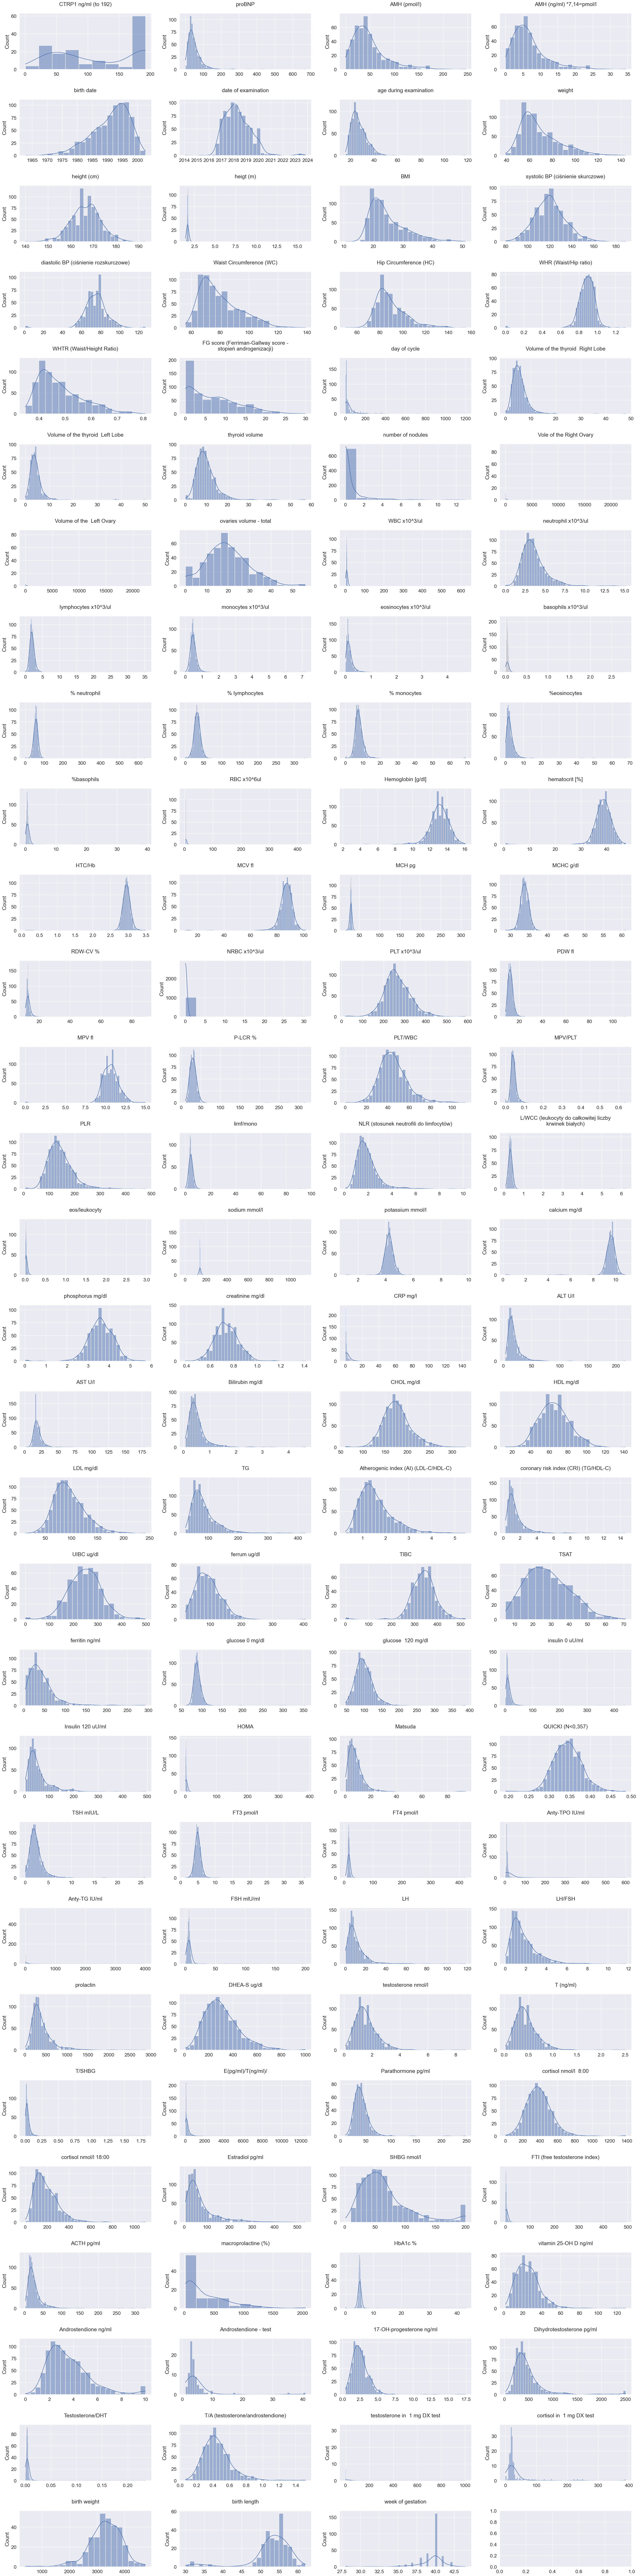

In [44]:
n_rows = 30
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 120))
sns.set(font_scale = 1.5)

for i, col in enumerate(continuous_attributes):
    ax = axes[int(i/n_cols)][i%n_cols]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title("\n".join(wrap(col, 40)) + '\n')
    ax.set_xlabel('')

fig.tight_layout()
plt.show()

## Mising Values

In [45]:
def display_percentage_of_missing_values(X):
    missing_values_percentage = (X.isna().mean() * 100).round(2).astype(str) + '%'
    return missing_values_percentage.to_frame().T

In [46]:
display_percentage_of_missing_values(df)

0 PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro CTRP1 ng/ml (to 192) CTRP1 ng/ml (>=192)  proBNP proBNP>125 AMH (pmol/l) AMH (ng/ml) *7,14=pmol/l AMH>48pmol/l/>6,8ng/ml AMH>=4,7 ng/ml AMH>=4,57 birth date date of examination age during examination  weight height (cm) heigt (m)     BMI systolic BP (ciśnienie skurczowe) diastolic BP (ciśnienie rozskurczowe) Hypertension Waist Circumference (WC)   WC>88 Hip Circumference (HC) WHR (Waist/Hip ratio) WHR>0,85 (WHO) WHR>0,8 (NIDDK) WHR risk for heart disease  WHTR (Waist/Height Ratio) WHTR>0,5 overweight/obesity 0-normal/low, 1-overweight, 2-obesity irregular cycles (0-nie, 1-tak) ovulation (0-brak, 1-obecna) PCO ovary morfology in USG (0-brak, 1--obecna) stromal hypertrophy in ovary (0-brak, 1-obecny) functional cyst teratoma    acne hirsutism FG score (Ferriman-Gallway score - stopień androgenizacji) day of cycle phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)  \
0                                              2.67%                                                          85.65%              85.65%  41.49%     41.31%       57.68%                   57.13%                  57.5%         57.87%    58.51%     25.76%              24.66%                 25.76%  27.69%      27.69%    27.69%  27.78%                            41.49%                                41.49%        41.4%                   35.42%  35.05%                 35.14%                35.14%         35.14%          35.14%                      52.35%                    35.51%    35.6%                                             27.87%                                33.39%                       40.66%                                         40.85%                                          40.39%          40.02%   40.11%  25.02%    25.11%                                             45.72%               44.25%                                             38.36%                             

0 hyperandrogenism elevated androgens elevated DHT hypothyroidism low FT3 Volume of the thyroid  Right Lobe Volume of the thyroid  Left Lobe thyroid volume nodules 0-lack, 1-RL,  2-LL, 3-both number of nodules chronic thyroiditis Vole of the Right Ovary Volume of the  Left Ovary ovaries volume - total follicules >12 follicules>25 hyperlipidemia elevated LDL and TG hepatosteatosis splenomegaly cholelithiasis WBC x10^3/ul neutrophil x10^3/ul lymphocytes x10^3/ul monocytes x10^3/ul eosinocytes x10^3/ul basophils x10^3/ul % neutrophil  % lymphocytes  % monocytes %eosinocytes  %basophils  RBC x10^6ul Hemoglobin [g/dl] hematocrit [%] HTC/Hb MCV fl MCH pg MCHC g/dl RDW-CV % NRBC x10^3/ul PLT x10^3/ul PDW fl MPV fl P-LCR % PLT/WBC MPV/PLT     PLR limf/mono NLR (stosunek neutrofili do limfocytów) L/WCC (leukocyty do całkowitej liczby krwinek białych) eos/leukocyty sodium mmol/l potassium mmol/l calcium mg/dl phosphorus mg/dl creatinine mg/dl CRP mg/l ALT U/l AST U/l Bilirubin mg/dl  \
0           39.56%             52.25%       45.17%         25.57%  37.07%                            30.45%                           30.63%         30.27%                              28.33%            27.78%              25.21%                  42.69%                    43.24%                 58.51%         42.41%        42.59%          7.18%               8.28%          43.61%       44.25%         44.62%        5.24%              13.34%               13.34%             13.43%               13.43%             13.43%        13.34%         13.34%      13.52%        13.43%      13.43%       5.24%             5.24%          5.24%  5.24%  5.24%  5.52%      5.8%    5.61%         6.26%        5.24%   5.7%   5.7%   5.89%   5.43%   5.24%  13.62%    13.52%                                  13.62%                                             13.71%            17.57%         15.0%            15.0%        15.55%           38.36%            7.36%   35.51%  15.46%  15.55%          35.33%   

0 CHOL mg/dl  CHOL

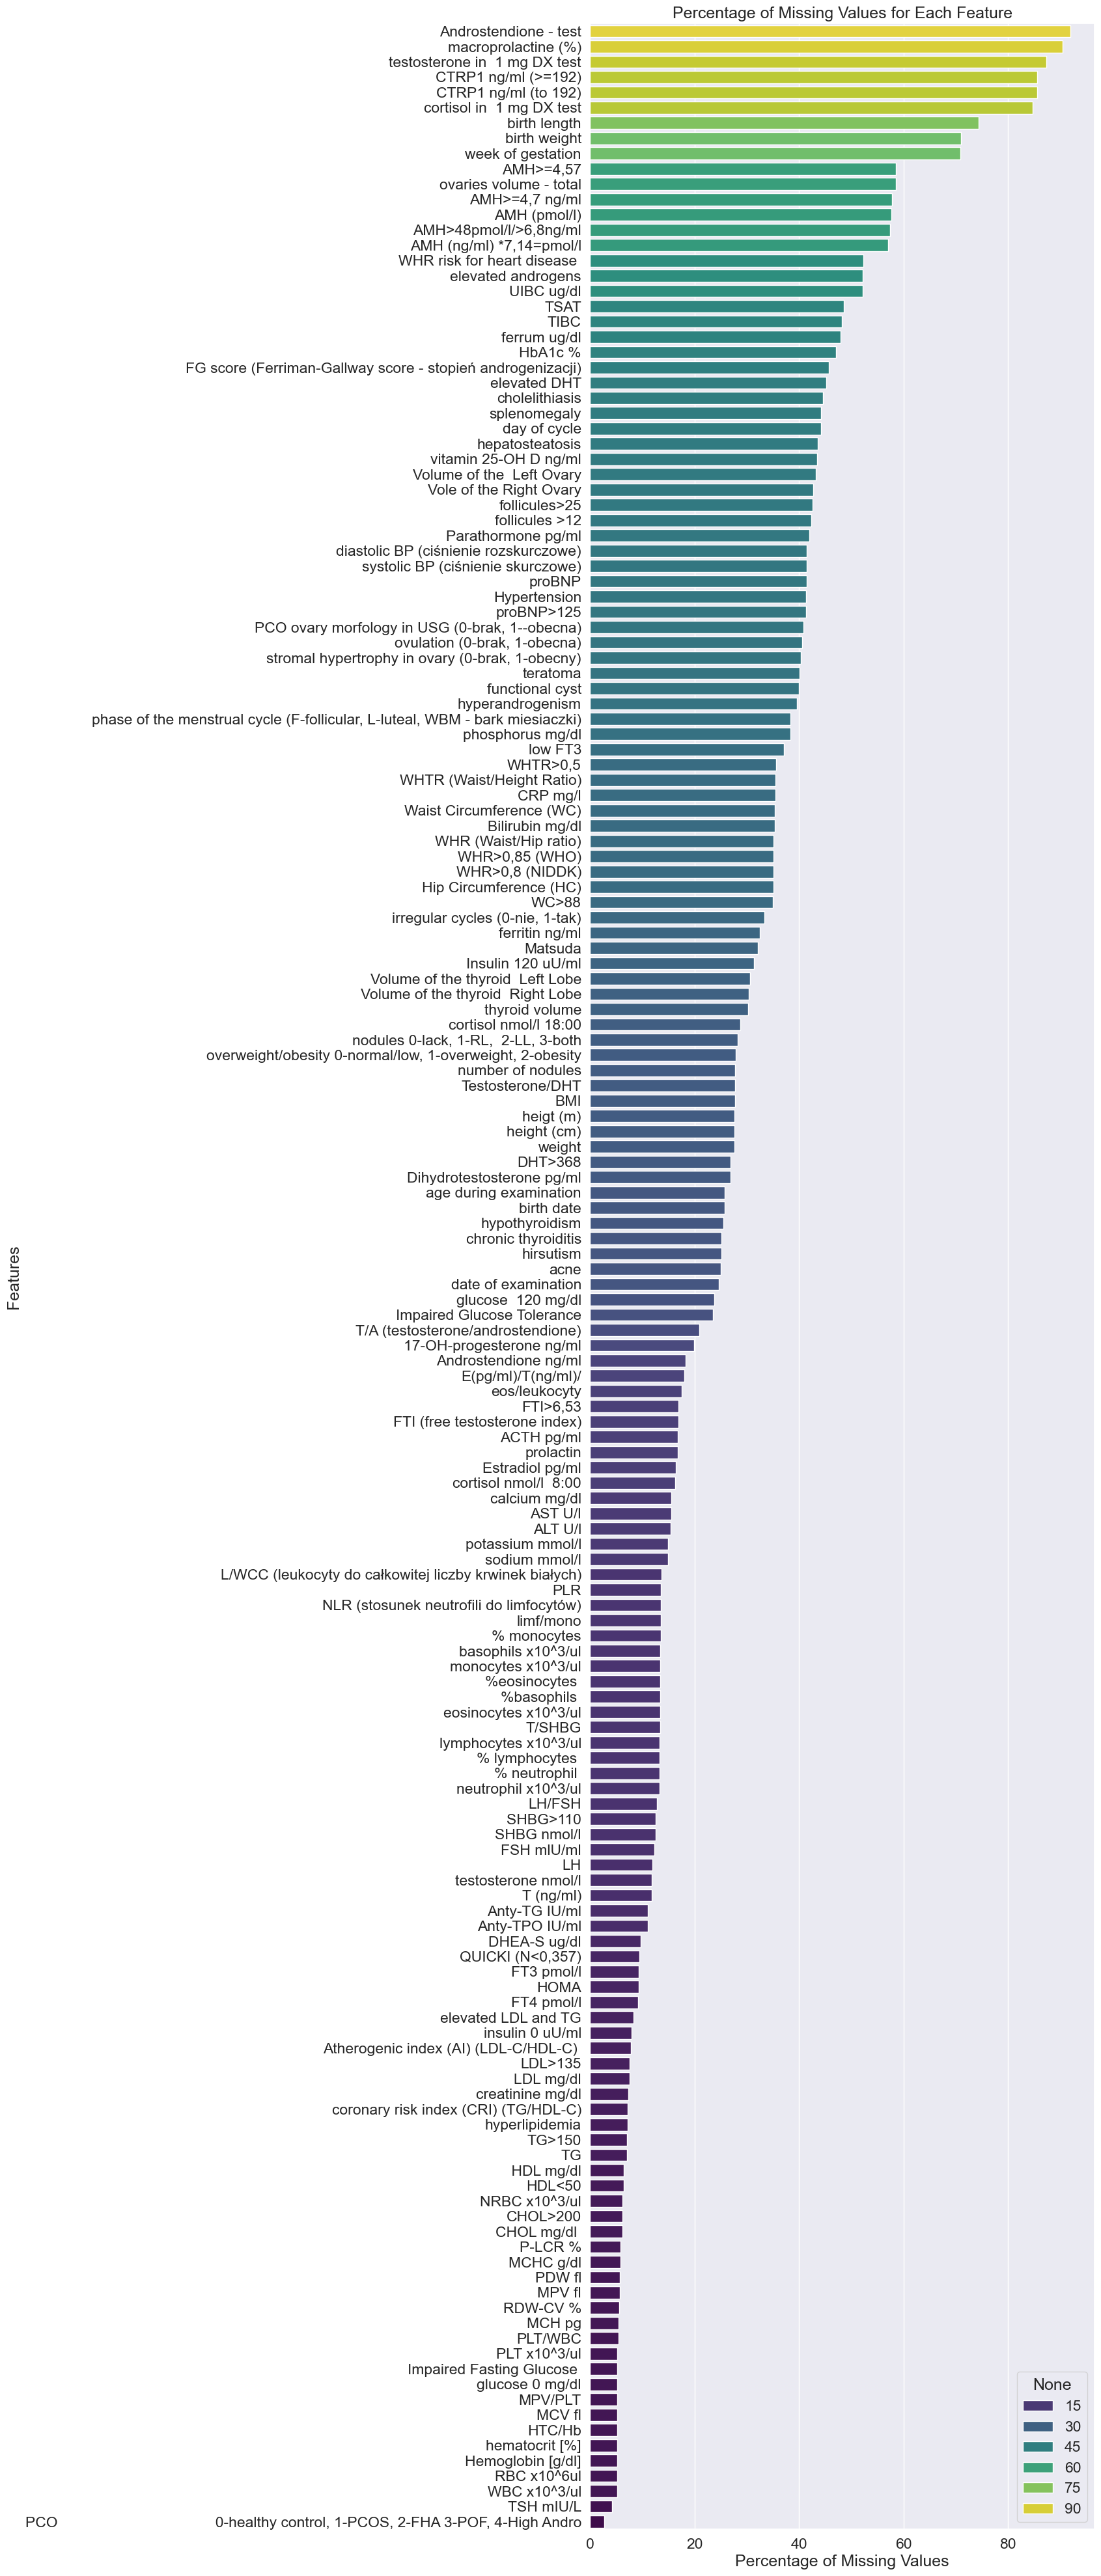

In [47]:
def plot_percentage_of_missing_values(df):
    missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)

    plt.figure(figsize=(10, 50))
    sns.barplot(x=missing_percentage, y=missing_percentage.index, palette="viridis", hue=missing_percentage)
    plt.xlabel("Percentage of Missing Values")
    plt.ylabel("Features")
    plt.title("Percentage of Missing Values for Each Feature")
    plt.show()

plot_percentage_of_missing_values(df)

## Correlations

In [48]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 1 to 1087
Data columns (total 164 columns):
 #    Column                                                                                         Dtype         
---   ------                                                                                         -----         
 0    PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  Int64         
 1    CTRP1 ng/ml (to 192)                                                                           float64       
 2    CTRP1 ng/ml (>=192)                                                                            Int64         
 3    proBNP                                                                                         float64       
 4    proBNP>125                                                                                     Int64         
 5    AMH (pmol/l)                                                              

In [49]:
attributes_to_exclude = ['birth date', 'date of examination', 'phase of the menstrual cycle (F-follicular, L-luteal, WBM - bark miesiaczki)',
                         'elevated androgens']

selected_attributes = list(df.columns)
for attr_to_remove in attributes_to_exclude:
    selected_attributes.remove(attr_to_remove)

corr_matrix = df[selected_attributes].corr(method ='pearson')

In [50]:
corr_matrix.head()

0                                                   PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  CTRP1 ng/ml (to 192)  CTRP1 ng/ml (>=192)    proBNP  proBNP>125  AMH (pmol/l)  AMH (ng/ml) *7,14=pmol/l  AMH>48pmol/l/>6,8ng/ml  AMH>=4,7 ng/ml  AMH>=4,57  age during examination    weight  height (cm)  heigt (m)       BMI  systolic BP (ciśnienie skurczowe)  diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)     WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHR risk for heart disease   WHTR (Waist/Height Ratio)  WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  functional cyst  teratoma      acne  hirsutism  FG score (Ferriman-Gallway score - stopień androgenizacji)  day of cycle  hyperandrogenism  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
PCO                                      0-heal...                                           1.000000                                                          0.120032             0.012213  0.024417   -0.016684     -0.141478                 -0.153323               -0.082263       -0.149323  -0.161104               -0.020405 -0.056056     0.001714  -0.000822 -0.054342                          -0.082885                              -0.020913     -0.045616                 -0.055222 -0.037124               -0.079606               0.031566        0.097815         0.097468                     0.041535                  -0.053726 -0.044170                                          -0.051060                                0.406541                     -0.208576                                       -0.217845                                        -0.147556        -0.034695 -0.028488  0.088452   0.040800                                          -0.157204               0.086859         -0.145077   
CTRP1 ng/ml (to 192)                                                                         0.120032                                                          1.000000             0.854021  0.201576    0.130500     -0.159254                 -0.158222               -0.093854        0.074286   0.092260                0.080776 -0.023785    -0.045225  -0.042484 -0.006661                          -0.270312                              -0.174686     -0.216925                 -0.072303 -0.073183               -0.053421              -0.047764        0.083939        -0.019470                    -0.055979                  -0.057344 -0.095038                                          -0.013064                               -0.013058                      0.075803                                       -0.081343                                        -0.015289         0.015774  0.026662  0.251083  -0.068220                                          -0.231903              -0.079139         -0.088019

In [51]:
def extract_significant_correlations(df, correlation_method, threshold=0.8):
    corr_matrix = df.corr(method=correlation_method)
    high_correlations_df = pd.DataFrame(columns=['feature_1', 'feature_2', f'{correlation_method}_correlation'])

    for i in range(len(corr_matrix)):
        for j in range(i+1, len(corr_matrix)):
            correlation_value = corr_matrix.values[i][j]
            if abs(correlation_value) >= threshold:
                high_correlations_df.loc[len(high_correlations_df)] = [corr_matrix.index[i], corr_matrix.columns[j], correlation_value]
        
    return high_correlations_df

### Spearman correlation

In [52]:
spearman_corr = extract_significant_correlations(df[selected_attributes], correlation_method='spearman', threshold=0.97)
spearman_corr

feature_1                                          feature_2  spearman_correlation
0                              AMH (pmol/l)                           AMH (ng/ml) *7,14=pmol/l              0.998222
1                            AMH>=4,7 ng/ml                                          AMH>=4,57              0.986017
2                               height (cm)                                          heigt (m)              0.986622
3       nodules 0-lack, 1-RL,  2-LL, 3-both                                  number of nodules              0.990922
4                            % lymphocytes   L/WCC (leukocyty do całkowitej liczby krwinek ...              0.974390
5                             %eosinocytes                                       eos/leukocyty              0.989280
6                                    HTC/Hb                                          MCHC g/dl             -0.991580
7   NLR (stosunek neutrofili do limfocytów)  L/WCC (leukocyty do całkowitej liczby krwinek ...             -0.985409
8                           insulin 0 uU/ml                                               HOMA              0.991818
9                           insulin 0 uU/ml                                   QUICKI (N<0,357)             -0.991823
10                                     HOMA                                   QUICKI (N<0,357)             -1.000000
11                      testosterone nmol/l                                          T (ng/ml)              1.000000
12                                   T/SHBG                      FTI (free testosterone index)              0.988911

In [53]:
spearman_corr = extract_significant_correlations(df[selected_attributes], correlation_method='spearman', threshold=0.8)
spearman_corr

feature_1                                          feature_2  spearman_correlation
0                             CTRP1 ng/ml (to 192)                                CTRP1 ng/ml (>=192)              0.838446
1                                     AMH (pmol/l)                           AMH (ng/ml) *7,14=pmol/l              0.998222
2                                     AMH (pmol/l)                             AMH>48pmol/l/>6,8ng/ml              0.831483
3                                     AMH (pmol/l)                                     AMH>=4,7 ng/ml              0.841726
4                                     AMH (pmol/l)                                          AMH>=4,57              0.836782
5                         AMH (ng/ml) *7,14=pmol/l                             AMH>48pmol/l/>6,8ng/ml              0.830512
6                         AMH (ng/ml) *7,14=pmol/l                                     AMH>=4,7 ng/ml              0.845134
7                         AMH (ng/ml) *7,14=pmol/l                                          AMH>=4,57              0.840355
8                                   AMH>=4,7 ng/ml                                          AMH>=4,57              0.986017
9                                           weight                                                BMI              0.923216
10                                          weight                           Waist Circumference (WC)              0.880352
11                                          weight                             Hip Circumference (HC)              0.871598
12                                          weight  overweight/obesity 0-normal/low, 1-overweight,...              0.808843
13                                     height (cm)                                          heigt (m)              0.986622
14                                             BMI                           Waist Circumference (WC)              0.869122
15                                             BMI                             Hip Circumference (HC)              0.834899
16                                             BMI                          WHTR (Waist/Height Ratio)              0.881713
17                                             BMI  overweight/obesity 0-normal/low, 1-overweight,...              0.838440
18                        Waist Circumference (WC)                             Hip Circumference (HC)              0.833751
19                        Waist Circumference (WC)                          WHTR (Waist/Height Ratio)              0.962274
20                       WHTR (Waist/Height Ratio)                                           WHTR>0,5              0.817082
21                       WHTR (Waist/Height Ratio)  overweight/obesity 0-normal/low, 1-overweight,...              0.800541
22                                        WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight,...              0.839020
23  PCO ovary morfology in USG (0-brak, 1--obecna)                                     follicules >12              0.831378
24                                       hirsutism  FG score (Ferriman-Gallway score - stopień and...              0.851592
25                                    elevated DHT                          Dihydrotestosterone pg/ml              0.829024
26                                    elevated DHT                                            DHT>368              0.952686
27               Volume of the thyroid  Right Lobe                                     thyroid volume              0.920915
28                Volume of the thyroid  Left Lobe                                     thyroid volume              0.879496
29             nodules 0-lack, 1-RL,  2-LL, 3-both                                  number of nodules              0.990922
30                         Vole of the Right Ovary                             ovaries volume - total              0.907710
31                       Volume of the  Left Ovary                       

### Pearson correlation

In [54]:
pearson_corr = extract_significant_correlations(df[selected_attributes], correlation_method='pearson', threshold=0.97)
pearson_corr

feature_1                      feature_2  pearson_correlation
0                    AMH (pmol/l)       AMH (ng/ml) *7,14=pmol/l             0.999484
1                  AMH>=4,7 ng/ml                      AMH>=4,57             0.986017
2        Waist Circumference (WC)      WHTR (Waist/Height Ratio)             0.973515
3         Vole of the Right Ovary      Volume of the  Left Ovary             0.999990
4              basophils x10^3/ul                    %basophils              0.977901
5              basophils x10^3/ul  FTI (free testosterone index)             0.972005
6                   NRBC x10^3/ul                  eos/leukocyty             0.983050
7                   NRBC x10^3/ul  FTI (free testosterone index)             0.987208
8                   NRBC x10^3/ul               Testosterone/DHT             0.978301
9                   eos/leukocyty  testosterone in  1 mg DX test             0.997750
10            testosterone nmol/l                      T (ng/ml)             1.000000
11  FTI (free testosterone index)               Testosterone/DHT             0.971436

In [55]:
pearson_corr = extract_significant_correlations(df[selected_attributes], correlation_method='pearson', threshold=0.8)
pearson_corr

feature_1                                          feature_2  pearson_correlation
0                              CTRP1 ng/ml (to 192)                                CTRP1 ng/ml (>=192)             0.854021
1                                      AMH (pmol/l)                           AMH (ng/ml) *7,14=pmol/l             0.999484
2                                    AMH>=4,7 ng/ml                                          AMH>=4,57             0.986017
3                                            weight                                                BMI             0.942206
4                                            weight                           Waist Circumference (WC)             0.905812
5                                            weight                             Hip Circumference (HC)             0.904634
6                                            weight                          WHTR (Waist/Height Ratio)             0.845265
7                                            weight  overweight/obesity 0-normal/low, 1-overweight,...             0.844829
8                                               BMI                           Waist Circumference (WC)             0.900359
9                                               BMI                             Hip Circumference (HC)             0.893095
10                                              BMI                          WHTR (Waist/Height Ratio)             0.914366
11                                              BMI  overweight/obesity 0-normal/low, 1-overweight,...             0.877479
12                         Waist Circumference (WC)                                              WC>88             0.832331
13                         Waist Circumference (WC)                             Hip Circumference (HC)             0.864540
14                         Waist Circumference (WC)                          WHTR (Waist/Height Ratio)             0.973515
15                         Waist Circumference (WC)                                           WHTR>0,5             0.817758
16                         Waist Circumference (WC)  overweight/obesity 0-normal/low, 1-overweight,...             0.834629
17                                            WC>88                          WHTR (Waist/Height Ratio)             0.823037
18                           Hip Circumference (HC)                          WHTR (Waist/Height Ratio)             0.835497
19                            WHR (Waist/Hip ratio)                              Androstendione - test            -0.849514
20                        WHTR (Waist/Height Ratio)                                           WHTR>0,5             0.835609
21                        WHTR (Waist/Height Ratio)  overweight/obesity 0-normal/low, 1-overweight,...             0.842524
22                                         WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight,...             0.828856
23   PCO ovary morfology in USG (0-brak, 1--obecna)                                     follicules >12             0.831378
24                                        hirsutism  FG score (Ferriman-Gallway score - stopień and...             0.823650
25                                     elevated DHT                                            DHT>368             0.952686
26                Volume of the thyroid  Right Lobe                                     thyroid volume             0.829149
27                 Volume of the thyroid  Left Lobe                                     thyroid volume             0.816711
28                          Vole of the Right Ovary                          Volume of the  Left Ovary             0.999990
29                          Vole of the Right Ovary                             ovaries volume - total             0.901227
30                        Volume of the  Left Ovary                             ovaries volume - total             0.910201
31                             lymphocytes x10^3/ul                       

## Others

In [56]:
# # search for IGF-1 (insulin growth hormone factor 1)
# for col in df.columns:
#     if any(keyword in col.lower() for keyword in ['igf', 'insulin']):
#         print(col)

In [57]:
# df.rename(columns={'PCO                                      0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro': 'PCO'}, inplace=True)